### Import Keras and Packages

In [1]:
import keras

from  keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
import matplotlib.pyplot as plt

In [3]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 9s 1us/step


In [4]:
X_train.shape

(60000, 28, 28)

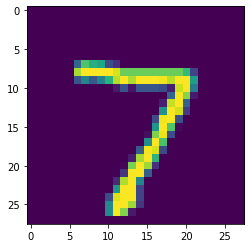

In [5]:
plt.imshow(X_test[0])

In [6]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


### Build a Neural Network

In [9]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Train and Test the Network

In [10]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

2022-07-14 11:55:24.074813: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-14 11:55:24.075452: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-14 11:55:24.087386: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ihubkbhaskar-Vostro-3681): /proc/driver/nvidia/version does not exist
2022-07-14 11:55:24.183424: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-14 11:55:24.836190: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18

Epoch 1/10


2022-07-14 11:55:34.181015: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 - 9s - loss: 0.1852 - accuracy: 0.9438 - val_loss: 0.1107 - val_accuracy: 0.9655 - 9s/epoch - 5ms/step
Epoch 2/10
1875/1875 - 7s - loss: 0.0779 - accuracy: 0.9753 - val_loss: 0.0807 - val_accuracy: 0.9747 - 7s/epoch - 4ms/step
Epoch 3/10
1875/1875 - 7s - loss: 0.0528 - accuracy: 0.9829 - val_loss: 0.0854 - val_accuracy: 0.9765 - 7s/epoch - 4ms/step
Epoch 4/10
1875/1875 - 7s - loss: 0.0403 - accuracy: 0.9862 - val_loss: 0.0706 - val_accuracy: 0.9794 - 7s/epoch - 4ms/step
Epoch 5/10
1875/1875 - 7s - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.0885 - val_accuracy: 0.9776 - 7s/epoch - 4ms/step
Epoch 6/10
1875/1875 - 7s - loss: 0.0268 - accuracy: 0.9909 - val_loss: 0.0936 - val_accuracy: 0.9765 - 7s/epoch - 4ms/step
Epoch 7/10
1875/1875 - 7s - loss: 0.0217 - accuracy: 0.9929 - val_loss: 0.0733 - val_accuracy: 0.9825 - 7s/epoch - 4ms/step
Epoch 8/10
1875/1875 - 8s - loss: 0.0204 - accuracy: 0.9931 - val_loss: 0.1110 - val_accuracy: 0.9773 - 8s/epoch - 4ms/step
Epoch 9/10
1875/187

2022-07-14 11:56:40.779781: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


In [12]:
print('Accuracy: {}% \nError: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.982200026512146% 
Error: 0.017799973487854004


In [13]:
model.save('classification_model.h5')

In [14]:
from keras.models import load_model

In [ ]:
pretrained_model = load_model('classification_model.h5')